# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns
sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

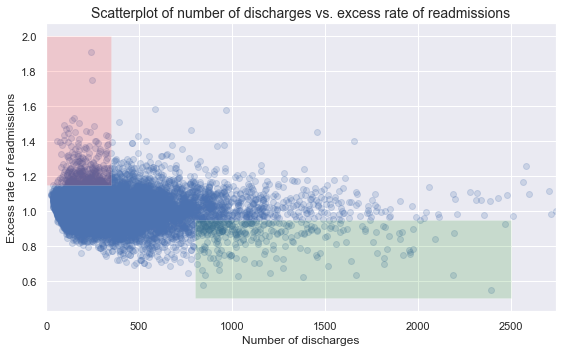

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

In [11]:
# clean_hospital_read_df is pretty long variable name, let's shorten it
chrdf = clean_hospital_read_df
chrdf.shape

(11578, 12)

In [12]:
chrdf.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


We are interested only in the rows which have excess readmission ratio of more than 1.

In [13]:
chrdf[chrdf['Excess Readmission Ratio'] > 1].head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [25]:
chrdf[chrdf['Excess Readmission Ratio'] > 1].shape

(5939, 12)

In [24]:
number_of_discharges = chrdf['Number of Discharges']
number_of_discharges.max()

6793

slope: -0.000029    intercept: 1.017948
r: -0.093096
r-squared: 0.008667
p-value 1.5022756426615086e-23
std_err 2.849824827849989e-06


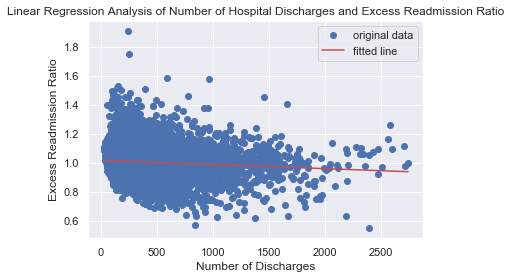

In [54]:
# perform linear regression
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
#x1 = [s for s in x if s.isdigit()]
#y1 = [s for s in y if s.isdigit()]
# following lines of code is taken from https://bit.ly/2FwNa8w
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) 
print("slope: %f    intercept: %f" % (slope, intercept))
print("r: %f" % r_value)
print("r-squared: %f" % r_value**2)
print("p-value", p_value)
print("std_err", std_err)
#plot the data along with the fitted line:
plt.plot(x, y, 'o', label='original data')
# below I had to convert x from list to np.array otherwise I was getting error that
# "can't multiply sequence by non-int of type 'numpy.float64'"
plt.plot(x, intercept + slope*np.array(x), 'r', label='fitted line')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Linear Regression Analysis of Number of Hospital Discharges and Excess Readmission Ratio')
plt.legend()
plt.show()

*The above plot shows that number of hospital discharges and excess readmission ratio are __slightly__ negatively correlated. Thus I agree with the analysis and the conclusions. However, we have to note that the correlation is not very strong so before making any important decisions, we need to do some more analysis.*

## Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### 1. Setup an appropriate hypothesis test.

__Before setting hypothesis test let's check if the data is normal__

Text(0, 0.5, 'Distribution of Hospital Discharges')

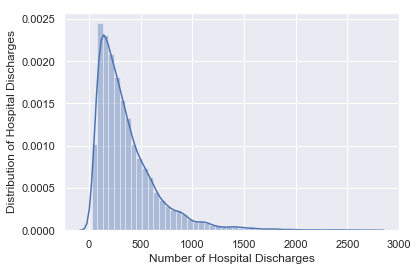

In [62]:
sns.distplot(x, hist=True)
plt.xlabel('Number of Hospital Discharges')
plt.ylabel('Distribution of Hospital Discharges')

Text(0, 0.5, 'Distribution of Excess Readmission Ratio')

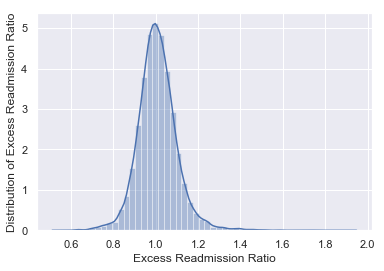

In [59]:
sns.distplot(y, hist=True)
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Distribution of Excess Readmission Ratio')

We can assume that the hospital data is independent. Although hospital discharges looks little bit skewed, but the number is also fairly large and the excess readmission ratio looks like normal. So we can safely say the data is close to  normally distributed.

__Null Hypothesis H0: The rate of readmission is independent of the increase in number of discharges. In other words, readmission rate does not significantly change with the change in number of hospital discharges.__

__Alternate Hypothesis Ha: The rate of readmission does decrease with the increase in number of hospital discharges.__

#### 2. Compute and report the observed significance value (or p-value).

In [65]:
t, p = stats.ttest_ind(x,y)
print("t-statistic :%f, p-value : %f" %(t, p))

t-statistic :130.030213, p-value : 0.000000


In [70]:
r, p = stats.pearsonr(x, y)
print('correlation coefficient : %f, p-value : %f' % (r, p))


correlation coefficient : -0.093096, p-value : 0.000000


#### 3. Report statistical significance for 𝛼 = .01.

__In this case because the p value is close to zero, alpha (significance level) does not matter at all.__

__By the way we reject null hypothesis in favor of alternate hypothesis that the rate of readmission does change with the change in the number of hospital discharges.__

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

__Statistical significance:__ Our analysis resulted in a statistically significant p-value, which led us to reject null hypothesis. This means that decrease in readmission rates would decrease with increase in number of discharges.

__Practical significance:__ However, the correlation coefficient is very low (-0.09), which questions the significance of p-value above. This suggests that readmission rates and discharge rates are not correlated.

__Recommendation:__ I would recommend to take into account other factors also, such as: type of illness etc. For example if the patient had serious illness, he/she might be more likely to revisit the hospital.

#### 5. Look at the scatterplot above.

    What are the advantages and disadvantages of using this plot to convey information?
    Construct another plot that conveys the same information in a more direct manner.


__Advantages:__ Easy to plot and great to display any correlation between two variables

__Disadvantages:__ Does not display quantitative measure of relationship between two variables and if you have more than two variables, it can't show the relationship

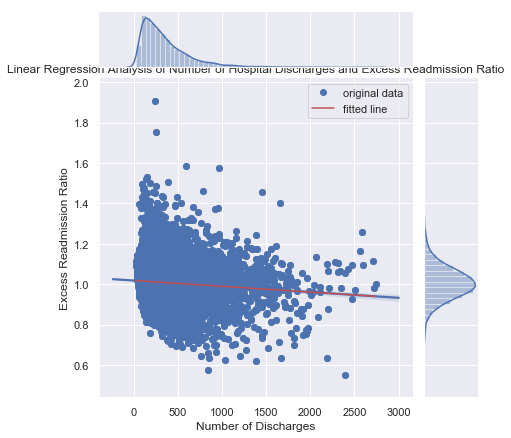

In [78]:
sns.jointplot(x, y, kind="reg")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*np.array(x), 'r', label='fitted line')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Linear Regression Analysis of Number of Hospital Discharges and Excess Readmission Ratio')
plt.legend()
plt.show()

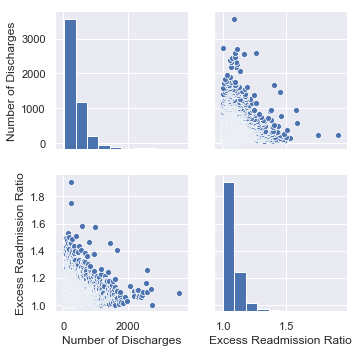

In [81]:
df = chrdf[['Number of Discharges','Excess Readmission Ratio']]
df = df[df['Excess Readmission Ratio'] > 1]
sns.pairplot(df)